#  Compare eigendecomposition of a line and a loop

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import itertools as it

In [2]:
#params

n_states = 19

In [3]:

line_A = np.diag(np.ones(n_states-1),1) + np.diag(np.ones(n_states-1),-1)
line_D = np.eye(n_states)*2.

line_D[0,0] = 1.
line_D[-1,-1] = 1.

line_laplace = line_D - line_A
line_laplace_n = np.eye(n_states) - np.dot(line_D**(.5),line_A).dot(line_D**.5)


In [4]:
loop_A = np.diag(np.ones(n_states-1),1) + np.diag(np.ones(n_states-1),-1)
loop_A[0,-1] = 1.
loop_A[-1,0] = 1.


loop_D = np.eye(n_states)*np.sum(loop_A,axis=0)

loop_laplace = loop_D - loop_A
loop_laplace = loop_D - loop_A
loop_laplace_n = np.eye(n_states) - np.dot(loop_D**(.5),loop_A).dot(loop_D**.5)


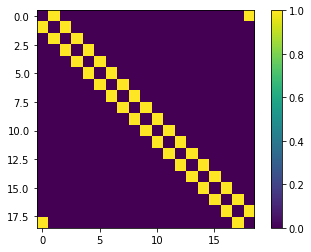

In [5]:
plt.imshow(loop_A)
plt.colorbar()

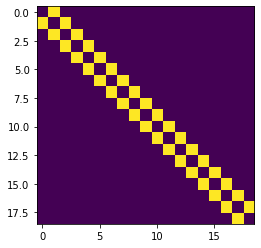

In [6]:
plt.imshow(line_A)

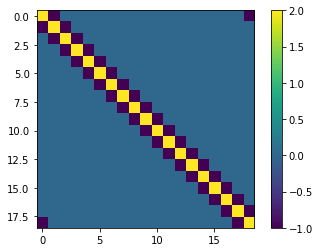

In [7]:
plt.imshow(loop_laplace)
plt.colorbar()

In [8]:
E,V = np.linalg.eig(line_laplace)


In [9]:
np.argsort(E)

array([14, 15, 16, 17, 18, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,
        1,  0])

In [10]:
gamma = 0.98
T = line_A/np.sum(line_A,axis=0)
SR = np.linalg.inv(np.eye(T.shape[0]) - gamma * T)
Tr = loop_A/np.sum(loop_A,axis=0)

SRr = np.linalg.inv(np.eye(Tr.shape[0]) - gamma * Tr)

In [11]:
E,V = np.linalg.eig(line_laplace)
V = V[:,np.argsort(E)]*(2*(E>0) - 1)
Er,Vr = np.linalg.eig(loop_laplace)
Vr = Vr[:,np.argsort(Er)]*(2*(Er>0) - 1)

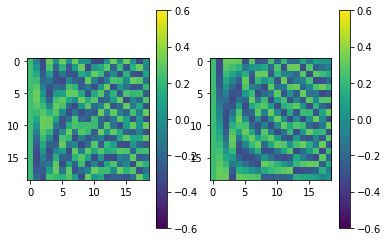

In [12]:
plt.subplot(1,2,1)
plt.imshow(Vr.real,interpolation='None',vmin=-.6,vmax=.6)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(V.real,interpolation='None',vmin=-.6,vmax=.6)
plt.colorbar()


# Adjaceny matrix of 2D world

In [9]:
mx = 30
state_id = np.arange(mx**2).reshape(mx,mx)

In [10]:
A = np.zeros([mx**2,mx**2])

for i in range(mx**2):
    ix = np.where(state_id==i)
    st_id = state_id[ix]
    
    #one down
    p_ = (ix[0]-1)
    if p_>=0:
        st2 = state_id[p_,ix[1]]
        A[st_id[0],st2[0]] = 1
        
    p_ = (ix[0]+1)
    if p_<(mx):
        st2 = state_id[p_,ix[1]]
        A[st_id[0],st2[0]] = 1
    p_ = (ix[1]-1)
    if p_>=0:
        st2 = state_id[ix[0],p_]
        A[st_id[0],st2[0]] = 1
    p_ = (ix[1]+1)
    if p_<(mx):
        st2 = state_id[ix[0],p_]
        A[st_id[0],st2[0]] = 1

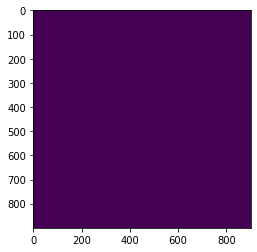

In [11]:
plt.imshow(A)

In [28]:
E,V = np.linalg.eig(A)

In [29]:
def eigdecomp(M):
    E, V = np.linalg.eig(M)
    idx = np.argsort(E)[::-1]
    return E,V[:, idx[:]].astype(float)


In [30]:
V,E =eigdecomp(A)

/Users/Yves/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [31]:
from sklearn.decomposition import NMF

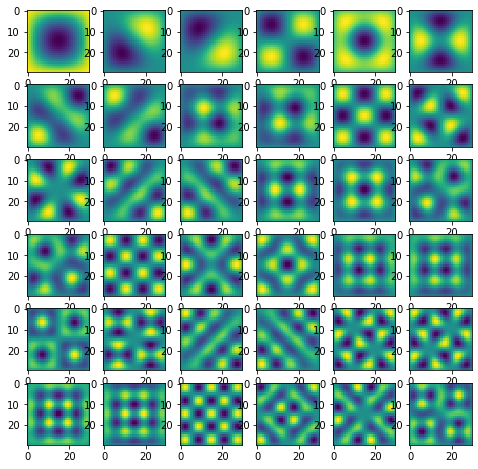

In [32]:
plt.figure(figsize=(8,8))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(E[:,i].reshape(mx,mx))

In [16]:
E[:5,:3]

array([[-6.60324476e-04,  1.47422563e-06, -1.85809720e-03],
       [-1.31387313e-03,  3.14127640e-05, -3.66862574e-03],
       [-1.95393967e-03,  1.16821894e-04, -5.38567197e-03],
       [-2.57395614e-03,  2.81854522e-04, -6.96656747e-03],
       [-3.16756034e-03,  5.46537636e-04, -8.37335241e-03]])

In [305]:
def vec2maze(vec, maze):
    vec_iter = iter(vec)
    res = []
    walls = []
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 1:
                res.append(next(vec_iter))
            else:
                res.append(0)
    return np.array(res).reshape(maze.shape)


In [306]:
E.real

array([-3.83797189e+00,  3.83797189e+00, -3.36501413e+00, -3.60149301e+00,
        3.36501413e+00, -3.60149301e+00,  3.60149301e+00,  3.60149301e+00,
        3.22870742e+00,  2.61944294e+00,  2.99222853e+00,  2.74981597e+00,
       -2.61944294e+00, -2.99222853e+00, -2.74981597e+00, -3.22870742e+00,
       -3.22870742e+00,  3.22870742e+00,  2.99222853e+00,  2.51333709e+00,
        2.74981597e+00, -2.99222853e+00, -2.51333709e+00, -2.74981597e+00,
        2.20361562e+00,  2.14055149e+00, -2.51333709e+00,  2.51333709e+00,
        1.66166005e+00, -2.20361562e+00, -1.66166005e+00, -2.14055149e+00,
        2.20361562e+00,  2.14055149e+00,  1.96713674e+00, -2.20361562e+00,
       -2.14055149e+00, -1.96713674e+00, -1.39787739e+00,  1.96713674e+00,
        1.59435114e+00,  1.63435627e+00,  1.39787739e+00, -1.96713674e+00,
       -1.63435627e+00, -1.59435114e+00,  1.39787739e+00, -1.63435627e+00,
        1.59435114e+00,  1.63435627e+00, -1.02509179e+00, -1.59435114e+00,
       -1.39787739e+00,  

In [307]:
out = vec2maze(E.real[0],np.ones([10,10]))

TypeError: 'numpy.float64' object is not iterable

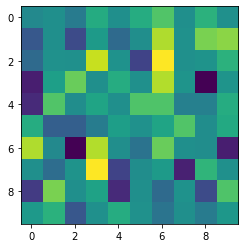

In [308]:
plt.imshow(out)

In [181]:
st2[0]

10

In [164]:
i = 12

In [165]:
ix = np.where(X==i)

In [166]:
ix

(array([2]), array([2]))

In [167]:

state_id[ix]

array([22])